# 🩺 Insurance Charges — EDA
## Exploring how smoking, BMI, age, and region relate to insurance cost
**Goal:** Tell a clear, data-driven story using EDA and clean visuals, ready for LinkedIn & GitHub.

### Objectives
- Understand the dataset & quality
- Explore distributions (numeric & categorical)
- Compare charges by smokers vs non-smokers and by region
- Visualize interactions (BMI×smoker, Age×smoker)
- Summarize insights, limitations, and next steps

In [2]:
#import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


# Global style
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.labelsize": 12,
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
})

def annotate_bars(ax, fmt="{:,.0f}", dy=0.01):
    """Annotate bars with their height values."""
    ymax = ax.get_ylim()[1]
    for p in ax.patches:
        h = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, h + dy*ymax, fmt.format(h),
                ha="center", va="bottom", fontsize=10, color="black")

def subtitle(fig, text, y=0.93, size=11):
    """Place a subtitle just under the main title."""
    fig.suptitle(text, fontsize=size, y=y)


In [3]:
#read the file 
df= pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 🔍 Basic Info
Check shape, dtypes, and missingness.

In [4]:
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Shape: (1338, 7)

Dtypes:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## 📊 Summary Statistics

In [5]:

df.describe().transpose().round(0)

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.0,14.0,18.0,27.0,39.0,51.0,64.0
bmi,1338.0,31.0,6.0,16.0,26.0,30.0,35.0,53.0
children,1338.0,1.0,1.0,0.0,0.0,1.0,2.0,5.0
charges,1338.0,13270.0,12110.0,1122.0,4740.0,9382.0,16640.0,63770.0


## 🧮 Categorical Distributions

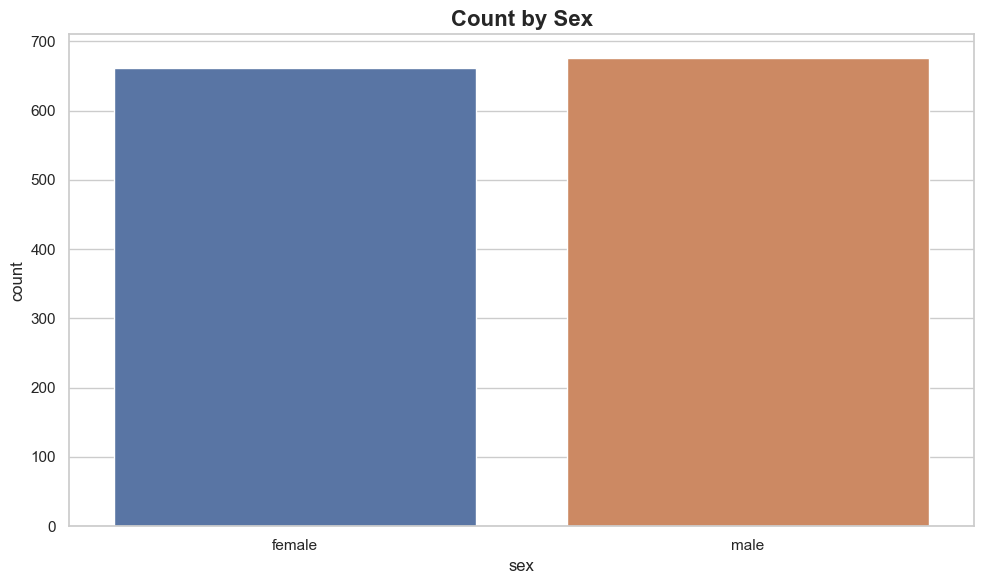

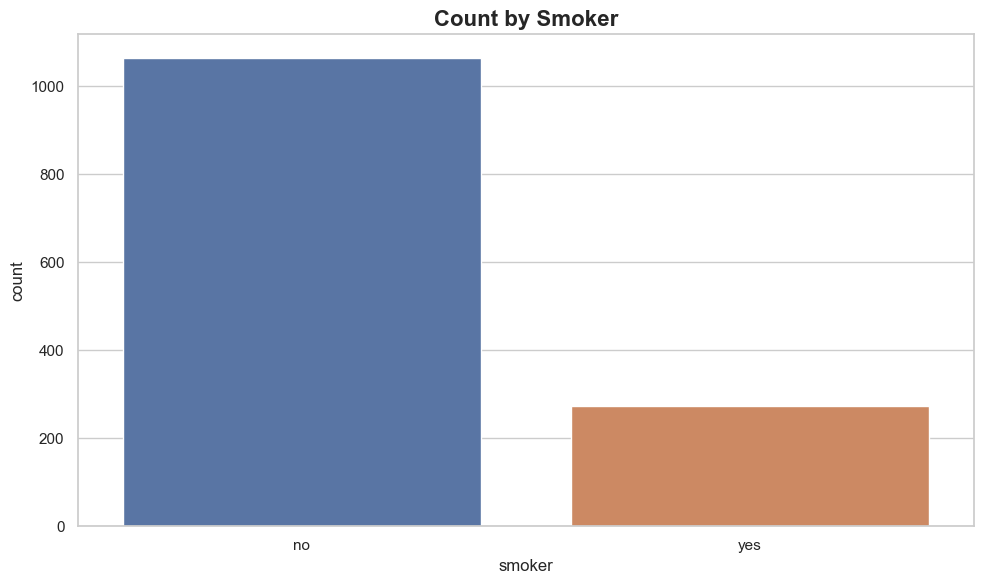

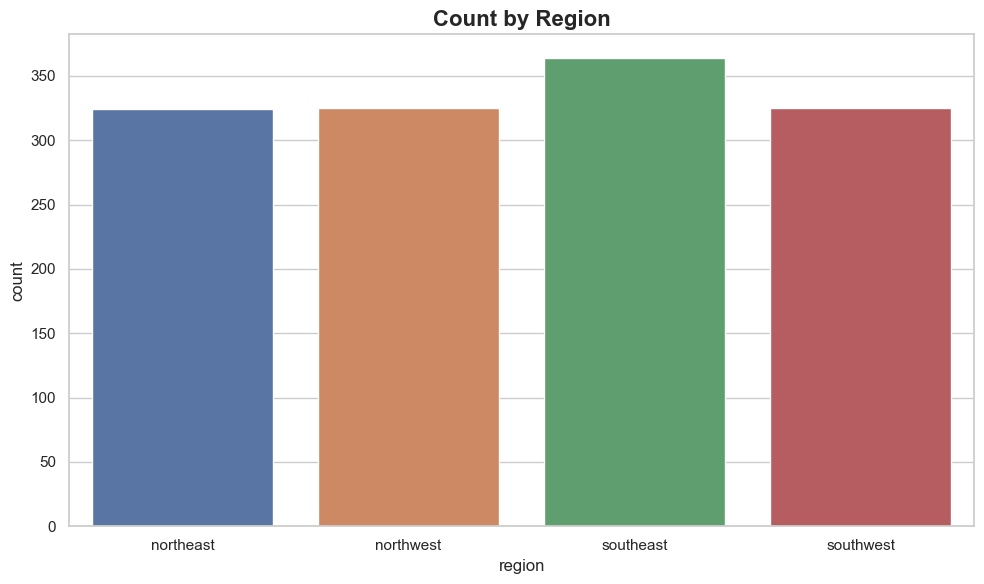

In [6]:
cats = ["sex", "smoker", "region"]
for c in cats:
    ax = sns.countplot(data=df, x=c, order=sorted(df[c].unique()))
    ax.set_title(f"Count by {c.capitalize()}")
    plt.tight_layout()
    plt.show()


## 📈 Numeric Distributions


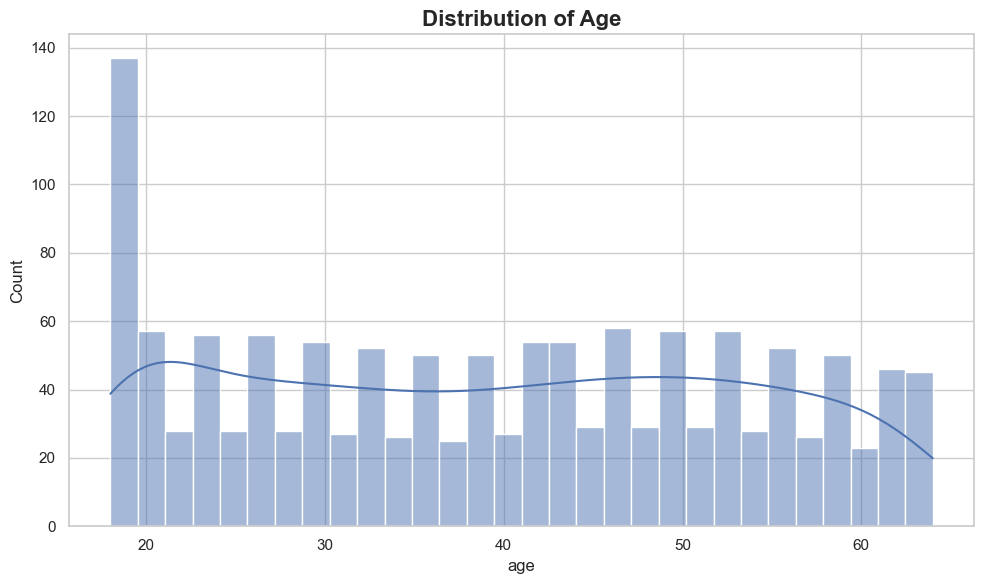

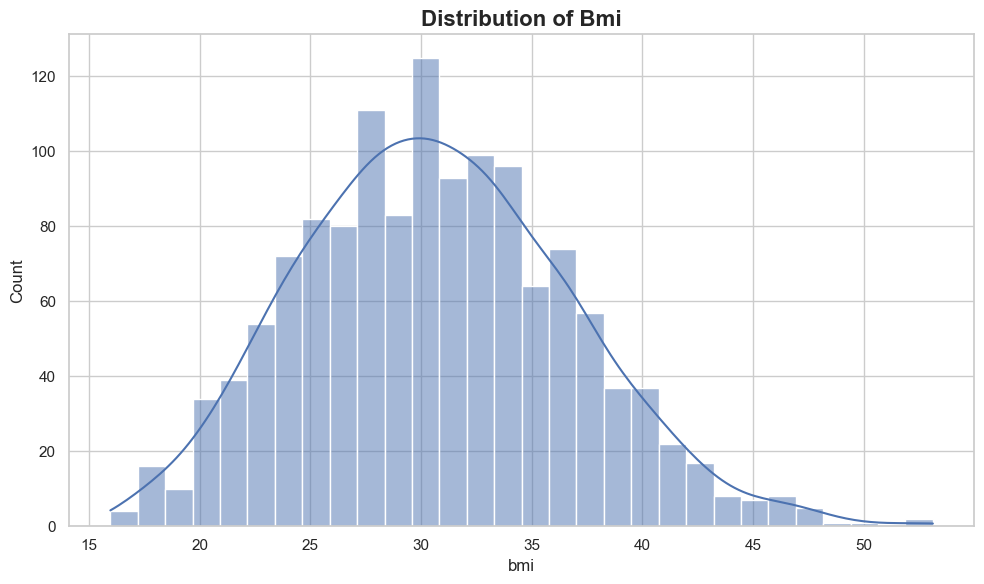

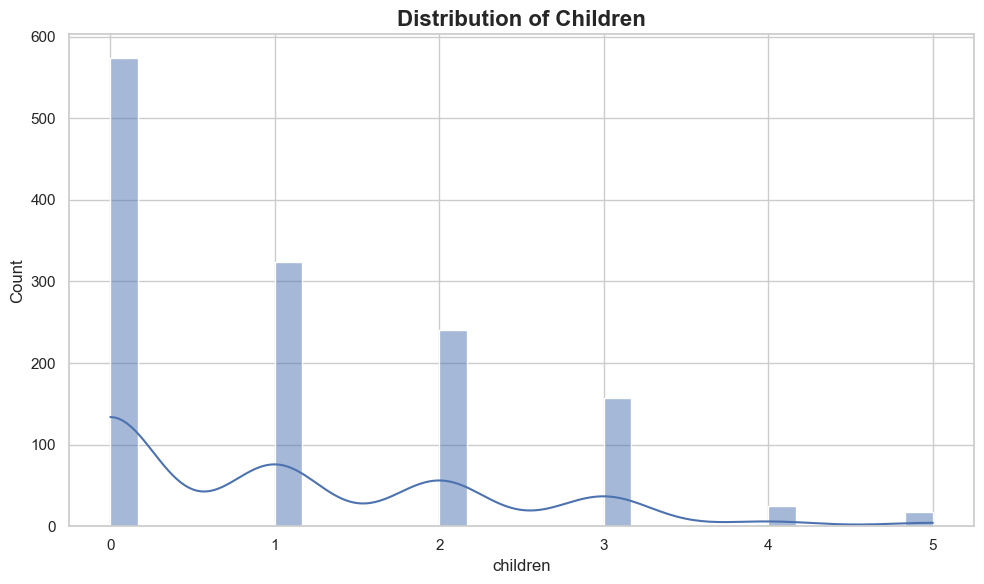

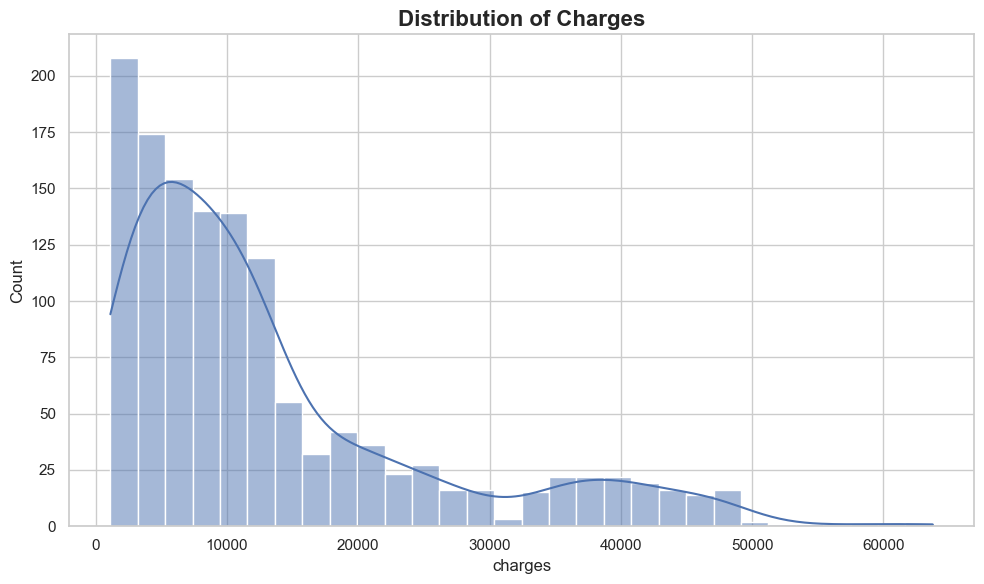

In [7]:
nums = ["age", "bmi", "children", "charges"]
for n in nums:
    ax = sns.histplot(data=df, x=n, kde=True, bins=30)
    ax.set_title(f"Distribution of {n.capitalize()}")
    plt.tight_layout(); plt.show()


## 🔢 Encode Categorical for Correlation


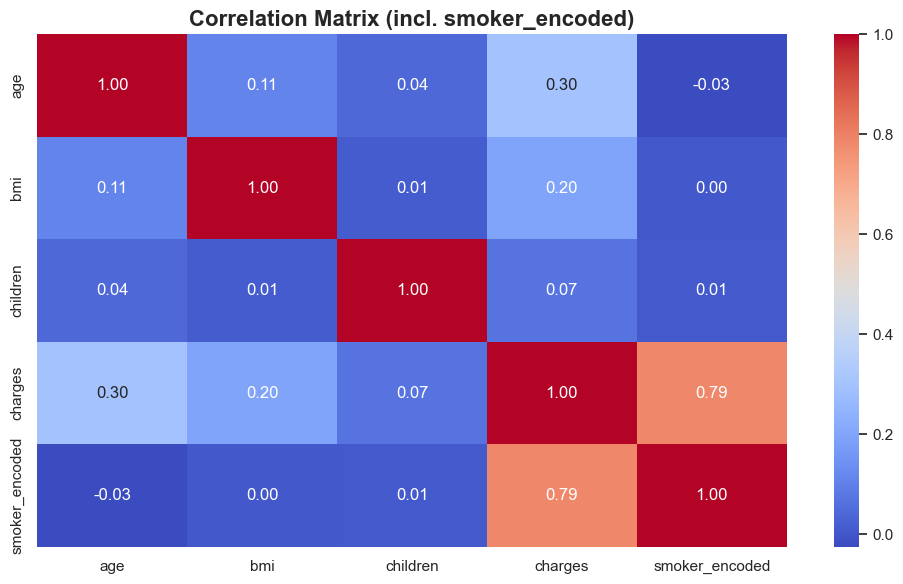

In [8]:
df["smoker_encoded"] = df["smoker"].map({"yes":1, "no":0})
corr_cols = ["age","bmi","children","charges","smoker_encoded"]
ax = sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
ax.set_title("Correlation Matrix (incl. smoker_encoded)")
plt.tight_layout()
plt.show()



## 🔗 Core Comparisons
### 9.1 Charges by Smoking Status


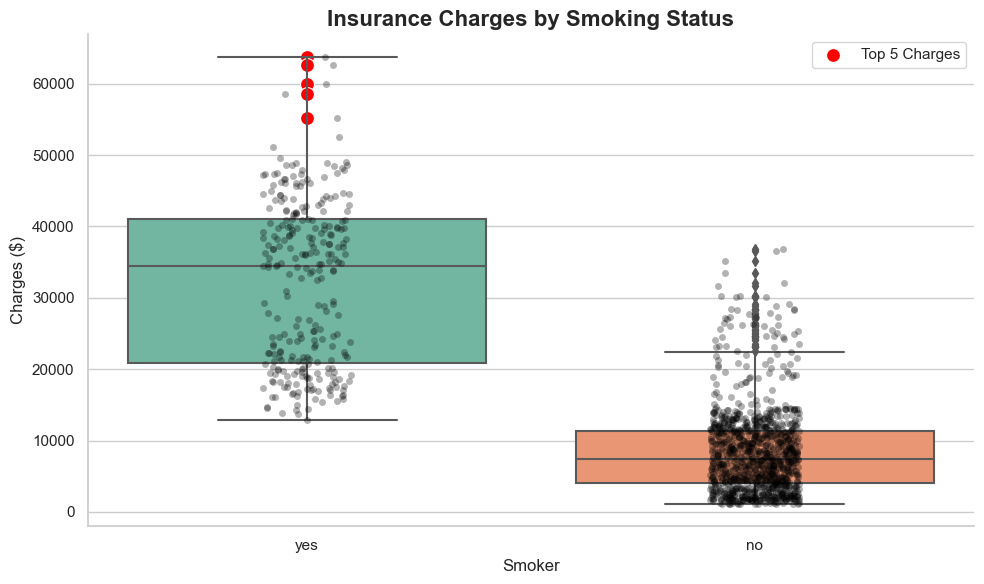

In [9]:
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
sns.stripplot(x='smoker', y='charges', data=df, color='black', alpha=0.3)
# Highlight top 5 charges
top5 = df.nlargest(5, 'charges')
sns.scatterplot(x=top5['smoker'], y=top5['charges'], color='red', s=100, label='Top 5 Charges')

plt.title("Insurance Charges by Smoking Status", fontsize=16, weight='bold')
plt.xlabel("Smoker", fontsize=12)
plt.ylabel("Charges ($)", fontsize=12)
plt.legend()
plt.tight_layout()
sns.despine()
plt.show()


### 9.2 Charges by Region (with smoker hue)


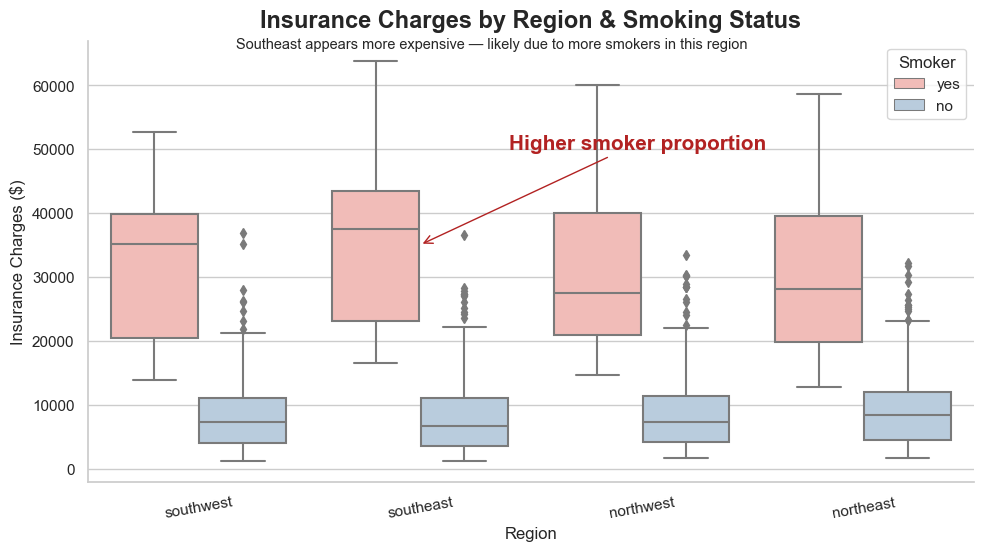

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style("whitegrid")

sns.boxplot(
    data=df,
    x='region',
    y='charges',
    hue='smoker',
    palette='Pastel1',
    ax=ax
)

# Main title
ax.set_title("Insurance Charges by Region & Smoking Status",
             fontsize=17, weight='bold',pad=10)

# Subtitle (just below title)
fig.suptitle("Southeast appears more expensive — likely due to more smokers in this region",
             fontsize=10.5, y=0.87)

ax.set_xlabel("Region", fontsize=12)
ax.set_ylabel("Insurance Charges ($)", fontsize=12)

ax.legend(title="Smoker")
ax.annotate(
    "Higher smoker proportion",
    xy=(1, 35000), xytext=(1.4, 50000),
    arrowprops=dict(arrowstyle="->", color="firebrick"),
    fontsize=15, color="firebrick",weight='bold'
)

plt.xticks(rotation=10)
sns.despine()
plt.tight_layout()
plt.show()



## 📊 Average Charges per Region (Ordered + Annotated)


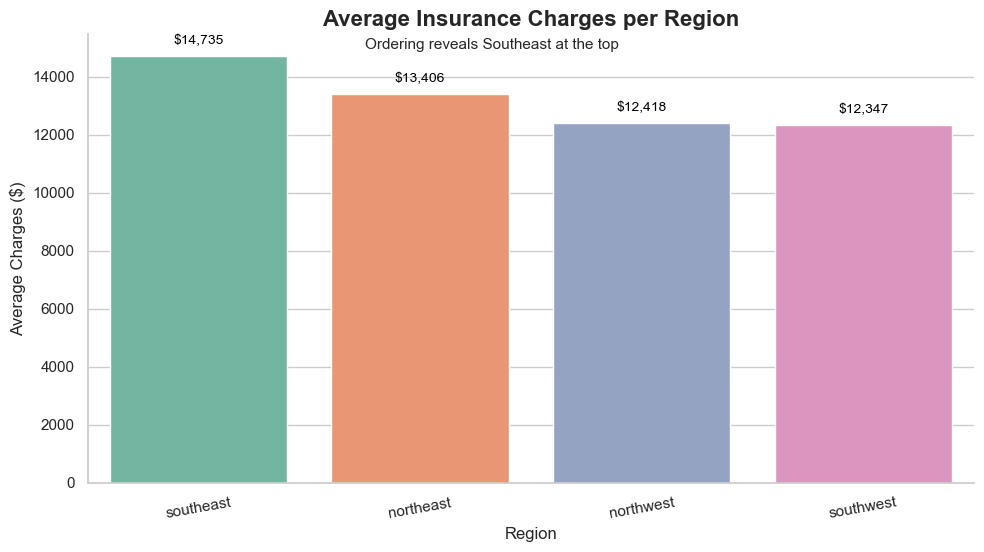

In [13]:
avg_region = (df.groupby("region", as_index=False)["charges"]
                .mean().sort_values("charges", ascending=False))

fig, ax = plt.subplots()
sns.barplot(data=avg_region, x="region", y="charges", palette="Set2", ax=ax,
            order=avg_region["region"])
ax.set_title("Average Insurance Charges per Region")
subtitle(fig, "Ordering reveals Southeast at the top",y=0.87)
ax.set_xlabel("Region"); ax.set_ylabel("Average Charges ($)")
annotate_bars(ax, fmt="${:,.0f}", dy=0.02)
plt.xticks(rotation=10)
sns.despine(); plt.tight_layout(); plt.show()


## 🧩 Interactions (BMI×Smoker, Age×Smoker)

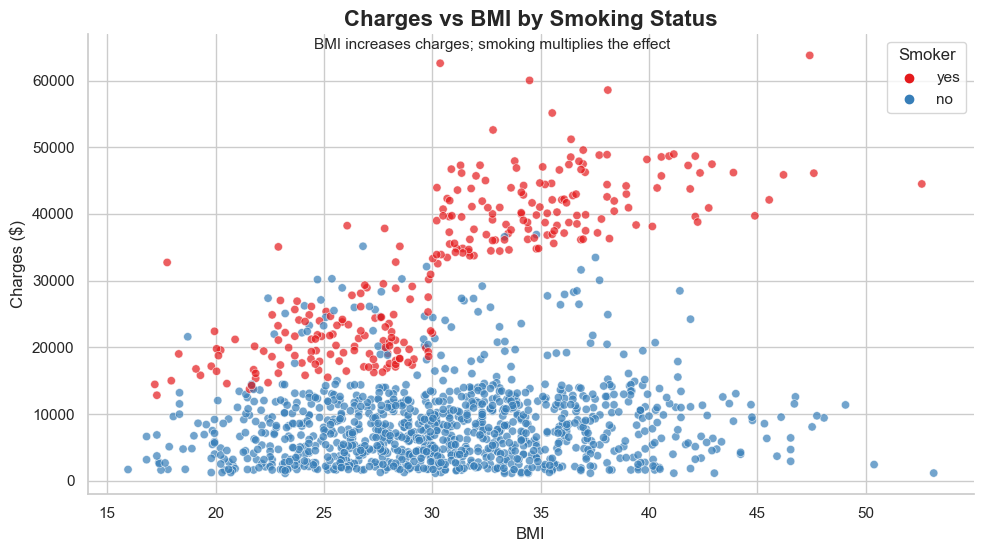

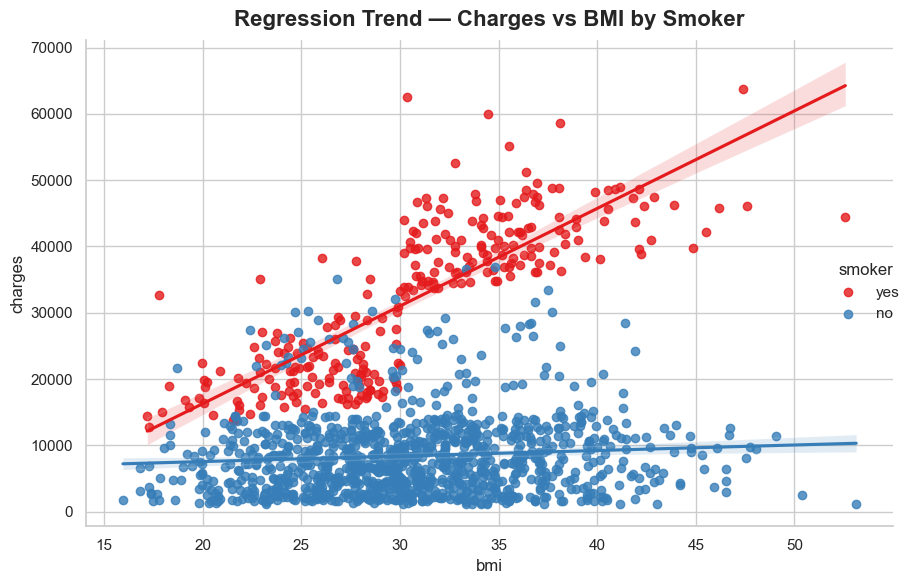

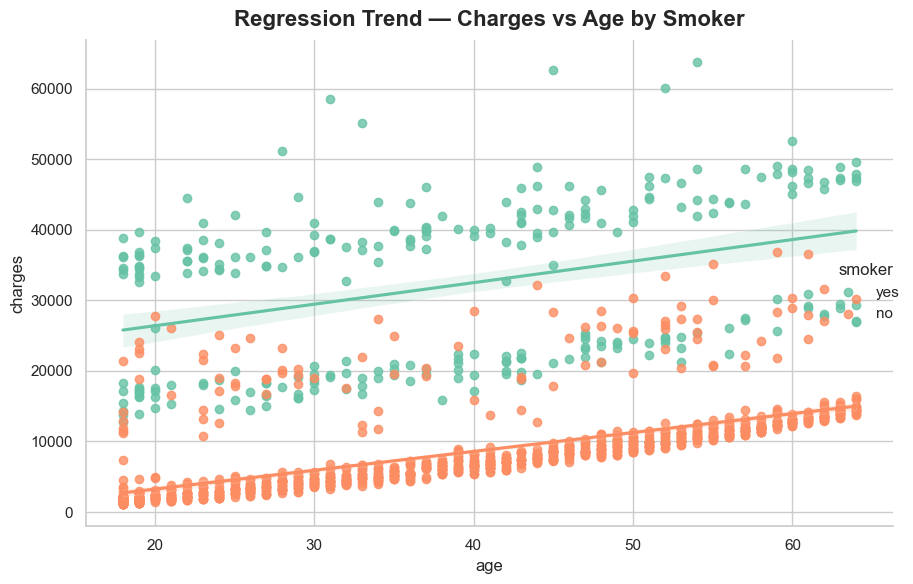

In [19]:
# BMI × smoker (scatter)
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker", alpha=0.7, ax=ax, palette='Set1')
ax.set_title("Charges vs BMI by Smoking Status")
subtitle(fig, "BMI increases charges; smoking multiplies the effect",y=0.87)
ax.set_xlabel("BMI")
ax.set_ylabel("Charges ($)")
ax.legend(title="Smoker")
sns.despine()
plt.tight_layout()
plt.show()

# BMI × smoker (regression trend)
g = sns.lmplot(data=df, x="bmi", y="charges", hue="smoker", height=6, aspect=1.4, palette='Set1')
plt.title("Regression Trend — Charges vs BMI by Smoker", pad=10, fontsize=16, weight="bold")
plt.tight_layout(); plt.show()

# Age × smoker (regression trend)
g = sns.lmplot(data=df, x="age", y="charges", hue="smoker", height=6, aspect=1.4, palette="Set2")
plt.title("Regression Trend — Charges vs Age by Smoker", pad=10, fontsize=16, weight="bold")
plt.tight_layout()
plt.show()


## ✅ Insights

- **Smoking is the strongest predictor** of insurance charges (highest correlation when encoded).
- **BMI and age** both increase charges; **smoking amplifies** their effect (interaction visible in plots).
- **Southeast region** shows higher average charges, which appears to be **explained by a higher proportion of smokers** (in this dataset).


## ⚠️ Limitations
- This is a single dataset; not necessarily population-representative.
- Observational patterns ≠ causation.
- We did not adjust for potential confounders beyond smoker, BMI, age, region